Importar bibliotecas

In [1]:
import fnmatch
import os
import csv
import scipy
from scipy.io import wavfile
from sklearn.neural_network import MLPRegressor
import sklearn.preprocessing as preprocessing
from matplotlib import pyplot as plt
import scipy.fftpack as fft
import numpy as np

Lendo as wav

['./110dist.wav', './110pure.wav', './146dist.wav', './146pure.wav', './196dist.wav', './196pure.wav', './20dist.wav', './20pure.wav', './247dist.wav', './247pure.wav', './330dist.wav', './330pure.wav', './330test.wav', './330train.wav', './440dist.wav', './440pure.wav', './50dist.wav', './50pure.wav', './82dist.wav', './82pure.wav', './880dist.wav', './880pure.wav']
['110pure.wav', '146pure.wav', '196pure.wav', '20pure.wav', '247pure.wav', '330pure.wav', '440pure.wav', '50pure.wav', '82pure.wav', '880pure.wav']
['110dist.wav', '146dist.wav', '196dist.wav', '20dist.wav', '247dist.wav', '330dist.wav', '440dist.wav', '50dist.wav', '82dist.wav', '880dist.wav']


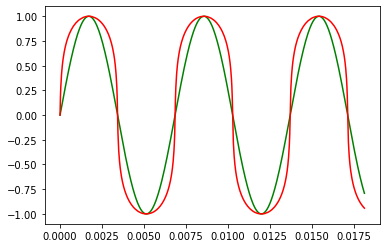

In [2]:
def recursive_files():
    matches = []
    for root, dirnames, filenames in os.walk('./'):
        for filename in fnmatch.filter(filenames, '*.wav'):
            matches.append(os.path.join(root, filename))
    return matches
    # wavfile.read('')

all_waves = list()

files = recursive_files()
files = sorted(files)
print(files)

for file in files:
    name = file.split('/')[-1]
    fs, signal =  wavfile.read(name)
    secs = signal.shape[0] / float(fs)
    Ts = 1.0/fs
    t = scipy.arange(0,secs,Ts)
    try: 
        if("train" in name ):
            train = list(signal)
        insert = [name, list(signal[0:800])]
        all_waves.append(insert)
    except IndexError:
        print(IndexError)
        continue

hX = []
hy = []
X = []
y = []

for line in all_waves:
    if("pure" in line[0]):
        hX.append(line[0])
        X.append(line[1])
    elif("dist" in line[0]):
        hy.append(line[0])
        y.append(line[1])
    elif ("train" in line[0]):
        x_train = line[1]
    else:
        y_test = line[1]

print(hX)
print(hy)


for i in range(len(X)):
    X[i] = preprocessing.maxabs_scale(X[i])
    
    y[i] = preprocessing.maxabs_scale(y[i])

w330test = preprocessing.maxabs_scale(y_test)
train = preprocessing.maxabs_scale(train)

p1 = plt.plot(scipy.arange(0,(1/44100*800),1/44100),X[1], "g")
p2 = plt.plot(scipy.arange(0,(1/44100*800),1/44100),y[1], "r")
plt.show()

In [3]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(200,100,50,30,20,10,20,30,50,100,200), random_state=1, max_iter=1000)
print("Regressor")

clf.fit(X,y)
print("fit")


Regressor
fit


In [10]:
y_train = []
test = []
for i in range(55):
    test.append(train[(i*800):((i+1)*800)])
    y_train.append(clf.predict([train[(i*800):((i+1)*800)]])[0])
print("predict")

print(len(y_train))

predict
55


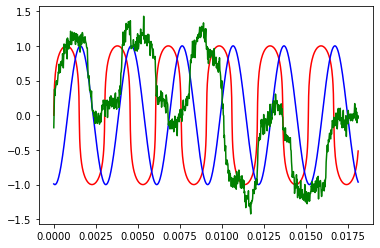

In [13]:
p2 = plt.plot(scipy.arange(0,(1/44100*800),1/44100),w330test, "r")
p1 = plt.plot(scipy.arange(0,(1/44100*800),1/44100),test[20], "b")
p3 = plt.plot(scipy.arange(0,(1/44100*800),1/44100),y_train[20], "g")

plt.show()

In [23]:
FFT = abs(scipy.fft(y_train[20]))
FFT_side = FFT[:1500]
freqs = fft.fftfreq(y_train[20].size, 1/44100)
fft_freqs = np.array(freqs)
freqs_side = freqs[:1500]
fft_freqs_side = np.array(freqs_side)
FFT1 = abs(scipy.fft(w330test))
FFT_side1 = FFT1[:1500]
freqs1 = fft.fftfreq(w330test.size, 1/44100)
fft_freqs1 = np.array(freqs1)
freqs_side1 = freqs1[:1500]
fft_freqs_side1 = np.array(freqs_side1)

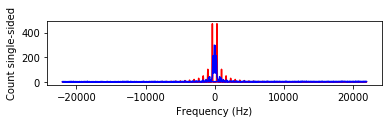

In [24]:
plt.subplot(313)
p3 = plt.plot(freqs, abs(FFT1), "r")
p4 = plt.plot(freqs1, abs(FFT), "b")

plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()

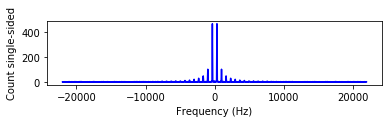

In [37]:
plt.subplot(313)
p4 = plt.plot(freqs1, abs(FFT), "b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()

In [40]:
lista = []
for i in y_train:
    for j in i:
        lista.append(j*10)
        
print(max(lista))
lista = np.array(lista, dtype="float32")
        
wavfile.write("../330mlp.wav",44100,lista)

13.987633090917216
